# Exploratory Data Analysis

Download datasets to work directly from Google Colaboratory to preprocess the data.

In [1]:
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/owid-covid-data.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/pop-deaths-data.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/flights.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/iata-icao.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/employment_data.csv &> /dev/null

Define imports and other libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demographics and COVID

The COVID data is spanning from the beginning of the year 2020 until the end of March 2023 (start and end day may differ from country to country) and there are 255 countries/regions represented. For each day, and each country we have a list of 67 features, including new cases, total cases, new deaths, total deaths, cases_per_million , deaths_per_million.




In [3]:
# Read the dataframes
covid_df = pd.read_csv('owid-covid-data.csv')
pop_deaths_df = pd.read_csv('pop-deaths-data.csv')

In [4]:
# Show covid data format
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
# Compute the number of total covid deaths, descending
covid_df.groupby(['iso_code']).last().sort_values(by='total_cases', ascending=False).head(20)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
OWID_WRL,None,World,2023-04-06,762200405.0,0.0,62620.286,6893177.0,0.0,471.286,95572.460,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
OWID_HIC,None,High income,2023-04-06,418585621.0,0.0,49794.429,2848151.0,0.0,398.429,334730.695,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
OWID_ASI,None,Asia,2023-04-06,295620256.0,0.0,12142.571,1627960.0,0.0,55.143,62613.059,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
OWID_EUR,None,Europe,2023-04-06,247953265.0,0.0,19816.143,2036097.0,0.0,128.714,332909.059,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
OWID_UMC,None,Upper middle income,2023-04-06,243099584.0,0.0,8997.286,2653556.0,0.0,41.714,96241.947,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
OWID_EUN,None,European Union,2023-04-06,183330398.0,0.0,12135.571,1222625.0,0.0,99.286,407268.031,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
OWID_NAM,None,North America,2023-04-06,123482353.0,0.0,27934.143,1592191.0,0.0,274.000,205692.965,...,NaN,NaN,NaN,NaN,NaN,6.003237e+08,NaN,NaN,NaN,NaN
USA,North America,United States,2023-04-06,102873924.0,176358.0,25194.000,1118800.0,1746.0,249.429,304099.937,...,24.600,NaN,2.770,78.86,0.926,3.382899e+08,1263038.600,13.60,-3.70,3714.8570
CHN,Asia,China,2023-04-06,99238586.0,0.0,32.143,120896.0,0.0,0.000,69597.774,...,48.400,NaN,4.340,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN


In [6]:
# Rename columns in population dataframe
old_names = ['Country Name', 'Country Code', 'Series Name', 'Series Code', '2020 [YR2020]']
new_names = ['location', 'iso_code', 'series_name', 'series_code', '2020']
pop_deaths_df = pop_deaths_df.rename(columns=dict(zip(old_names, new_names)))

# Change format of the population and deaths dataframe
population_df = pop_deaths_df[pop_deaths_df['series_name'].apply(lambda x: x in ['Population, total'])]
population_df = population_df[['iso_code', '2020']].rename(columns={'2020': 'population_2020'})
deaths_df = pop_deaths_df[pop_deaths_df['series_name'].apply(lambda x: x in ['Death rate, crude (per 1,000 people)'])]
deaths_df = deaths_df[['iso_code', '2020']].rename(columns={'2020': 'deaths_per_1000_2020'})
pop_deaths_df = deaths_df.merge(population_df, on='iso_code')
pop_deaths_df = pop_deaths_df.replace('..', np.nan)
pop_deaths_df['deaths_per_1000_2020'] = pop_deaths_df['deaths_per_1000_2020'].astype(float)
pop_deaths_df['population_2020'] = pop_deaths_df['population_2020'].astype(float)

In [7]:
# Compute total deaths per year 2020
pop_deaths_df['total_deaths_2020'] = (pop_deaths_df['deaths_per_1000_2020'] * pop_deaths_df['population_2020']) / 1000

In [8]:
# Show population and deaths data 
pop_deaths_df.head()

,iso_code,deaths_per_1000_2020,population_2020,total_deaths_2020
0,AFG,7.113000,38972230.0,2.772095e+05
1,AFE,7.620547,685112705.0,5.220934e+06
2,AFW,10.601297,466189102.0,4.942209e+06
3,ALB,10.785000,2837849.0,3.060620e+04
4,DZA,5.398000,43451666.0,2.345521e+05


For the population and overall deaths data in 2020, we have 266 countries/regions represented.

In [9]:
# Description of the dataframe
pop_deaths_df.describe()

,deaths_per_1000_2020,population_2020,total_deaths_2020
count,253.000000,2.610000e+02,2.530000e+02
mean,8.150610,2.919336e+08,2.406366e+06
std,2.724508,9.558564e+08,7.561522e+06
min,1.219000,1.106900e+04,1.127710e+02
25%,6.380000,1.596049e+06,1.640135e+04
50%,7.673752,1.029708e+07,9.835770e+04
75%,9.500000,5.342320e+07,5.191992e+05
max,18.000000,7.820982e+09,6.281892e+07


In [10]:
# Country with the most detahs in 2020, sorted descending
pop_deaths_df.merge(covid_df[['iso_code', 'location']].drop_duplicates(), on='iso_code').sort_values(by='total_deaths_2020', ascending=False).head(20)

,iso_code,deaths_per_1000_2020,population_2020,total_deaths_2020,location
88,IND,7.350,1.396387e+09,1.026345e+07,India
40,CHN,7.070,1.411100e+09,9.976477e+06,China
204,USA,10.300,3.315011e+08,3.414461e+06,United States
142,NGA,12.997,2.083274e+08,2.707631e+06,Nigeria
89,IDN,8.964,2.718580e+08,2.436935e+06,Indonesia
159,RUS,14.600,1.440731e+08,2.103468e+06,Russia
147,PAK,7.060,2.271967e+08,1.604009e+06,Pakistan
26,BRA,7.420,2.131963e+08,1.581917e+06,Brazil
97,JPN,11.100,1.262610e+08,1.401497e+06,Japan
125,MEX,9.330,1.259983e+08,1.175564e+06,Mexico


## Flights

[European Flights by Eurocontrol](https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-07-12) dataset, with recordings of arrival and departures for every European airport, between January 1st, 2016, to May 31st, 2022.

[IATA/ICAO List by IP2Location](https://github.com/ip2location/ip2location-iata-icao) dataset, describing airports (including geographical location, i.e., latitude and longitude) worldwide.

In [11]:
flights_df = pd.read_csv('flights.csv')
flights_df['APT_COUNTRY'] = flights_df['STATE_NAME']
flights_df['DATE'] = pd.to_datetime(flights_df['FLT_DATE'],
                                    format='%Y-%m-%dT%H:%M:%SZ')
flights_df['DAY'] = flights_df['DATE'].dt.day
flights_df['MONTH'] = flights_df['MONTH_NUM']
flights_df

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label,APT_COUNTRY,DATE,DAY,MONTH
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW),Belgium,2016-01-01,1,1
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR),Belgium,2016-01-01,1,1
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI),Belgium,2016-01-01,1,1
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG),Belgium,2016-01-01,1,1
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS),Belgium,2016-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688094,2022,5,MAY,2022-05-31T00:00:00Z,LYBE,Belgrade - Nikola Tesla,Serbia,80,85,165,NaN,NaN,NaN,Belgrade - Nikola Tesla (LYBE),Serbia,2022-05-31,31,5
688095,2022,5,MAY,2022-05-31T00:00:00Z,LYPG,Podgorica,Montenegro,19,18,37,NaN,NaN,NaN,Podgorica (LYPG),Montenegro,2022-05-31,31,5
688096,2022,5,MAY,2022-05-31T00:00:00Z,LZIB,Bratislava,Slovakia,21,21,42,20.0,19.0,39.0,Bratislava (LZIB),Slovakia,2022-05-31,31,5
688097,2022,5,MAY,2022-05-31T00:00:00Z,UDYZ,Yerevan,Armenia,39,40,79,NaN,NaN,NaN,Yerevan (UDYZ),Armenia,2022-05-31,31,5


In [12]:
iata_icao_df = pd.read_csv('iata-icao.csv') \
                 .rename(columns=lambda _: 'APT_' + _.upper())
iata_icao_df

,APT_COUNTRY_CODE,APT_REGION_NAME,APT_IATA,APT_ICAO,APT_AIRPORT,APT_LATITUDE,APT_LONGITUDE
0,AE,Ash Shariqah,SHJ,OMSJ,Sharjah International Airport,25.328600,55.517200
1,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.428301,54.458099
2,AE,Al Fujayrah,FJR,OMFJ,Fujairah International Airport,25.112200,56.324001
3,AE,Abu Zaby,XSB,OMBY,Sir Bani Yas Airport,24.283611,52.580278
4,AE,Ra's al Khaymah,RKT,OMRK,Ras Al Khaimah International Airport,25.613501,55.938801
...,...,...,...,...,...,...,...
8977,ZW,Midlands,GWE,FVTL,Thornhill Air Base,-19.436399,29.861900
8978,ZW,Bulawayo,BUQ,FVBU,Joshua Mqabuko Nkomo International Airport,-20.017401,28.617901
8979,ZW,Manicaland,CHJ,FVCH,Chipinge Airport,-20.206699,32.628300
8980,ZW,Mashonaland West,KAB,FVKB,Kariba Airport,-16.519800,28.885000


In [13]:
# Data recorded between [min, max]
flights_df['DATE'].min(), flights_df['DATE'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2022-05-31 00:00:00'))

In [14]:
# Missing values
1.0 - flights_df.count() / len(flights_df)

YEAR             0.000000
MONTH_NUM        0.000000
MONTH_MON        0.000000
FLT_DATE         0.000000
APT_ICAO         0.000000
APT_NAME         0.000000
STATE_NAME       0.000000
FLT_DEP_1        0.000000
FLT_ARR_1        0.000000
FLT_TOT_1        0.000000
FLT_DEP_IFR_2    0.697262
FLT_ARR_IFR_2    0.697262
FLT_TOT_IFR_2    0.697262
Pivot Label      0.000000
APT_COUNTRY      0.000000
DATE             0.000000
DAY              0.000000
MONTH            0.000000
dtype: float64

In [15]:
# Missing values
1.0 - iata_icao_df.count() / len(iata_icao_df)

APT_COUNTRY_CODE    0.003563
APT_REGION_NAME     0.000000
APT_IATA            0.000111
APT_ICAO            0.133489
APT_AIRPORT         0.000000
APT_LATITUDE        0.000000
APT_LONGITUDE       0.000000
dtype: float64

In [16]:
flights_iata_icao_df = flights_df.merge(
    iata_icao_df[~iata_icao_df['APT_IATA'].isna() &
                 ~iata_icao_df['APT_ICAO'].isna() &
                 ~iata_icao_df['APT_COUNTRY_CODE'].isna()],
    on='APT_ICAO', how='inner'
)
flights_iata_icao_df = flights_iata_icao_df[['YEAR', 'MONTH', 'DAY', 'DATE', 
                                             'FLT_DEP_1', 'FLT_ARR_1',
                                             'FLT_TOT_1',
                                             'APT_ICAO', 'APT_IATA',
                                             'APT_COUNTRY', 'APT_COUNTRY_CODE',
                                             'APT_REGION_NAME',
                                             'APT_NAME', 'APT_AIRPORT',
                                             'APT_LATITUDE', 'APT_LONGITUDE']]
flights_iata_icao_df

,YEAR,MONTH,DAY,DATE,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,APT_ICAO,APT_IATA,APT_COUNTRY,APT_COUNTRY_CODE,APT_REGION_NAME,APT_NAME,APT_AIRPORT,APT_LATITUDE,APT_LONGITUDE
0,2016,1,1,2016-01-01,4,3,7,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
1,2016,1,2,2016-01-02,9,11,20,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
2,2016,1,3,2016-01-03,10,17,27,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
3,2016,1,4,2016-01-04,18,17,35,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
4,2016,1,5,2016-01-05,12,13,25,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673720,2022,5,27,2022-05-27,3,3,6,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480
673721,2022,5,28,2022-05-28,4,6,10,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480
673722,2022,5,29,2022-05-29,7,6,13,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480
673723,2022,5,30,2022-05-30,5,5,10,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480


In [17]:
len(flights_iata_icao_df)

673725

The merger of the two datasets results in 673,725 recordings for the time series of flights at European airports, with details about every airport. Computing the number of flights before and after the COVID outburst, one can notice the drop during the pandemic (from *17,151,646* in 2019 to *7,331,172* in 2020).

Note that 2022 is half-year.

In [18]:
# We can group by year, month, day, range by date
flights_iata_icao_df.groupby('YEAR')['FLT_TOT_1'].agg('sum').to_frame()

,FLT_TOT_1
YEAR,
2016,15868408
2017,16415465
2018,17645148
2019,17151646
2020,7331172
2021,9141273
2022,5061581


In [19]:
# Airport codes: APT_ICAO, APT_IATA
# We can group by country, maybe region (if there are more than two airports)
# For display I have both the City - Neighbour and Airport Name, and position
flights_iata_icao_df.groupby(['YEAR', 'APT_COUNTRY_CODE'])['FLT_TOT_1'] \
                    .agg('sum').groupby(level='YEAR').nlargest(3) \
                    .reset_index(level=0, drop=True).to_frame()

FLT_TOT_1
YEAR APT_COUNTRY_CODE           
2016 DE                  2112172
     GB                  2027515
     ES                  1847513
2017 DE                  2148968
     GB                  2081431
     ES                  1954298
2018 DE                  2230890
     GB                  2126049
     ES                  2065215
2019 DE                  2218918
     GB                  2115593
     ES                  2109632
2020 DE                   918629
     ES                   888403
     FR                   878535
2021 ES                  1245954
     FR                  1118790
     DE                  1073449
2022 ES                   698760
     DE                   602079
     GB                   592783

Glossary of Abbreviations:
* **IATA**: International Air Transport Association
* **ICAO**: International Civil Aviation Organization
* **IFR**: Instrument Flight Rules (for simplicity, as opposed to VFR, this refers to airlines and commercial flights for passengers - the ones of interest for the analysis)
* **VFR**: Visual Flight Rules (for simplicity, as opposed to IFR, operating an aircraft visually and not guided by instruments)

## Employment

To analyze the influence of the COVID-19 pandemic on employment, we will be utilizing the ILOSTAT dataset titled [Impact of Covid-19 on Employment](https://www.kaggle.com/datasets/vineethakkinapalli/impact-of-covid19-on-employment-ilostat). This dataset comprises employment data for various countries and regions in 2020 and includes several employment indicators. The primary indicator we will be focusing on to illustrate the impact of COVID-19 on employment is the percentage of working hours lost. Through visualizing this indicator for different countries and regions, we can assess how COVID-19 related policies, including lockdowns, work from home, and curfew, affected employment.

In [20]:
# Load the dataset
employment_df = pd.read_csv('employment_data.csv')
employment_df.sample(5)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
150,Sierra Leone,106281.548,3.8,105.437,87.864,2.02,1042.847,1116.147,23.5
168,Tonga,995.745,7.4,1.983,1.652,2.12,10.830,15.210,15.9
207,Americas: Lower-middle income,514126.871,18.5,2924.015,2436.679,1.42,5259.102,7144.794,23.2
238,Pacific Islands,651579.988,3.7,632.256,526.880,1.20,7456.990,8606.701,24.3
210,Latin America and the Caribbean,9626460.750,16.2,46485.576,38737.980,1.32,102886.713,143269.235,22.0


In [21]:
list(employment_df.columns)

['country',
 'total_weekly_hours_worked(estimates_in_thousands)',
 'percentage_of_working_hrs_lost',
 'percent_hours_lost_40hrs_per_week',
 'percent_hours_lost_48hrs_per_week',
 'labour_dependency_ratio',
 'employed_female_25+_2019',
 'employed_male_25+_2019',
 'ratio_of_weekly_hours_worked_by_population_age_15-64']

In [22]:
additional_regions = ['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean', 'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific', 'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands', 'Southern Asia', 'Europe and Central Asia', 'Northern, Southern and Western Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia', 'Western Asia', 'European Union 28', 'G20', 'ASEAN', 'BRICS', 'World excluding BRICS', 'G7', 'MENA', 'Arab League', 'CARICOM', 'European Union 27']

In [23]:
# Divide the whole dataframe in countries and regions
regions_mask = employment_df['country'].str.contains(':') | employment_df['country'].isin(additional_regions)
regions_df = employment_df[regions_mask]
countries_df = employment_df[~regions_mask]

In [24]:
regions_df.sample(5)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
237,South-Eastern Asia,1.230280e+07,8.4,28314.748,23595.623,1.09,118032.203,161558.842,27.2
242,Southern Asia: Upper-middle income,1.047581e+06,6.0,1672.078,1393.398,2.28,6555.134,23794.559,18.0
220,Arab States,2.221344e+06,9.0,5512.031,4593.359,2.31,6783.943,40704.795,20.1
187,World: Lower-middle income,4.116501e+07,11.3,131683.815,109736.513,1.72,269585.761,629453.594,21.7
212,Latin America and the Caribbean: Lower-middle ...,5.141269e+05,18.5,2924.015,2436.679,1.42,5259.102,7144.794,23.2


In [25]:
countries_df.sample(5)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
121,Niger,338809.140,1.1,93.003,77.503,1.53,2453.468,3185.344,29.3
173,"Tanzania, United Republic of",1003404.661,1.8,468.825,390.687,1.16,9068.887,9821.313,31.2
166,Turkmenistan,94586.183,3.8,94.510,78.758,1.51,791.639,1147.974,24.3
58,Gabon,23903.213,8.3,53.853,44.877,3.06,191.304,344.924,18.1
151,El Salvador,93306.748,19.4,560.720,467.266,1.57,959.926,1232.165,22.2


In [26]:
# Get some descriptive stats about the % of lost working hours for countries
countries_df['percentage_of_working_hrs_lost'].describe()

count    189.000000
mean       8.816931
std        4.835092
min       -0.100000
25%        5.100000
50%        8.600000
75%       11.800000
max       27.500000
Name: percentage_of_working_hrs_lost, dtype: float64

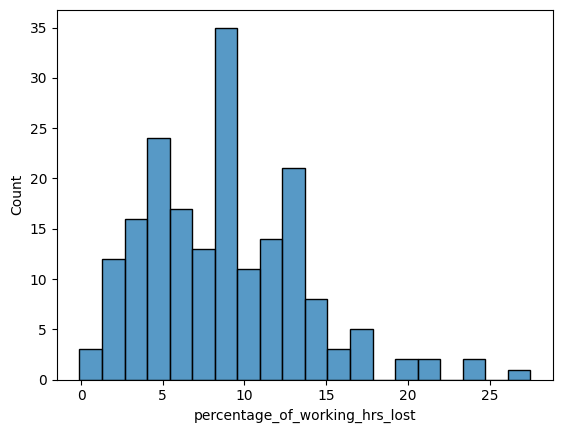

In [27]:
sns.histplot(countries_df['percentage_of_working_hrs_lost'], bins=20)
plt.show()

In [28]:
# Find countries with the highest percentage of lost working hours
employment_df.sort_values(by=['percentage_of_working_hrs_lost'], ascending=False)[['country', 'percentage_of_working_hrs_lost']]

,country,percentage_of_working_hrs_lost
131,Peru,27.5
71,Honduras,24.3
130,Panama,23.5
4,Argentina,21.0
36,Colombia,20.9
...,...,...
18,Belarus,1.3
55,Finland,1.3
121,Niger,1.1
127,New Zealand,0.8


In [29]:
# Is -0.1 an outlier?

In [30]:
# Get some descriptive stats about the % of lost working hours for regions
regions_df['percentage_of_working_hrs_lost'].describe()

count    94.000000
mean      9.139362
std       3.457428
min       2.500000
25%       7.000000
50%       8.800000
75%      10.575000
max      18.500000
Name: percentage_of_working_hrs_lost, dtype: float64